# Recurrent Neural Network - LSTM -  BTC

### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
plt.style.use("ggplot")

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

### Loading the Data

In [2]:
df = pd.read_csv("BTC-USD.csv")

## Preprocessing Data

In [3]:
# menyeting date menjadi format date
df = df.set_index("Date")[['Close']].tail(1000)
df = df.set_index(pd.to_datetime(df.index))

# Normalizing Data
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [4]:
df.head()

,Close
Date,
2021-04-13,0.892388
2021-04-14,0.881960
2021-04-15,0.887371
2021-04-16,0.841257
2021-04-17,0.817714


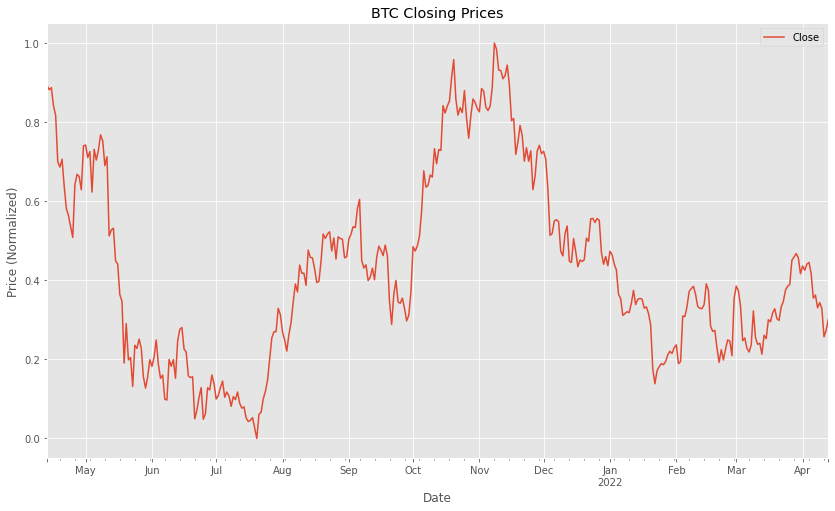

In [10]:
# Plot
df.plot(figsize=(14,8))
plt.title("BTC Closing Prices")
plt.ylabel("Price (Normalized)")
plt.show()

### Menyiapkan data untuk LTSM

In [6]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [8]:
def visualize_training_results(results):
    """
    Plots loss dan accuracy untuk training dan test
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [9]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Membuat angka spesifikasi untuk hiden layer
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # menambahkan drop di hidden layer
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

Split Data

In [11]:
# How many periods looking back to learn
n_per_in  = 30

# How many periods to predict
n_per_out = 10

# Features (in this case it's 1 because there is only one feature: price)
n_features = 1

# Splitting the data into appropriate sequences
X, y = split_sequence(list(df.Close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))


## Modeling - LSTM (RNN)

### Membuat Neural Network

In [12]:
# Instatiating the model
model = Sequential()

# Activation
activ = "softsign"

# Input layer
model.add(LSTM(30, activation=activ, return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=6, n_nodes=12, activation=activ)

# Final Hidden layer
model.add(LSTM(10, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 30, 12)            2064      
                                                                 
 lstm_2 (LSTM)               (None, 30, 12)            1200      
                                                                 
 lstm_3 (LSTM)               (None, 30, 12)            1200      
                                                                 
 lstm_4 (LSTM)               (None, 30, 12)            1200      
                                                                 
 lstm_5 (LSTM)               (None, 30, 12)            1200      
                                                                 
 lstm_6 (LSTM)               (None, 30, 12)            1

In [13]:
# Compiling the data with selected specifications
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### Fitting dan Training RNN

In [14]:
res = model.fit(X, y, epochs=800, batch_size=32, validation_split=0.1)

Epoch 1/800
10/10 [==============================] - 14s 249ms/step - loss: 0.2125 - accuracy: 0.1735 - val_loss: 0.0982 - val_accuracy: 0.1515
Epoch 2/800
10/10 [==============================] - 1s 93ms/step - loss: 0.1779 - accuracy: 0.1803 - val_loss: 0.0689 - val_accuracy: 0.1515
Epoch 3/800
10/10 [==============================] - 1s 91ms/step - loss: 0.1398 - accuracy: 0.1803 - val_loss: 0.0421 - val_accuracy: 0.1515
Epoch 4/800
10/10 [==============================] - 1s 91ms/step - loss: 0.1050 - accuracy: 0.1803 - val_loss: 0.0252 - val_accuracy: 0.1515
Epoch 5/800
10/10 [==============================] - 1s 89ms/step - loss: 0.0785 - accuracy: 0.1803 - val_loss: 0.0188 - val_accuracy: 0.1515
Epoch 6/800
10/10 [==============================] - 1s 91ms/step - loss: 0.0659 - accuracy: 0.1803 - val_loss: 0.0157 - val_accuracy: 0.1515
Epoch 7/800
10/10 [==============================] - 1s 91ms/step - loss: 0.0608 - accuracy: 0.1803 - val_loss: 0.0126 - val_accuracy: 0.1515
Epoc

### Plotting Accuracy & Loss

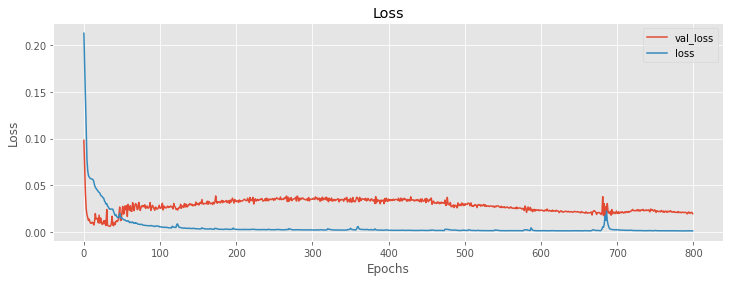

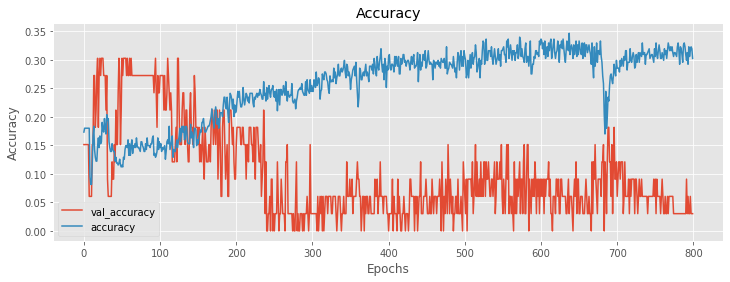

In [15]:
visualize_training_results(res)

## Visual Prediksi

### Validating the Model 
Plot perbedaan antara harga penutupan Aktual dan harga Prediksi

Predicted Prices:
 [[48933.8931189855], [48453.47366551764], [48431.54004930201], [48762.48434457865], [49583.16236870238], [50295.246992548666], [51006.154531455155], [51792.5485500571], [52194.535435519385], [53171.677981659464]]

Actual Prices:
 [[46622.675781], [45555.992188], [43206.738281], [43503.84765599999], [42287.664063], [42782.136719], [42207.671875], [39521.902344], [40127.183594], [41167.367188]]


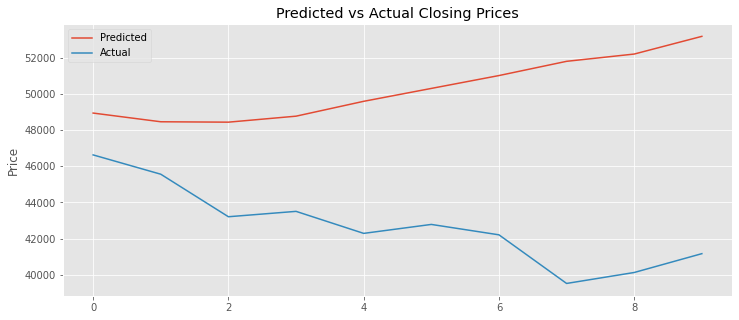

In [16]:
plt.figure(figsize=(12,5))

# Mendapatkan prediksi dari prediksi dari variabel x terakhir
yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]

# Mengubah ke nilai awal
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Mendapatkan nilai aktual dari varibel y terakhir
actual = scaler.inverse_transform(y[-1].reshape(-1,1))

# mencetak hasil prediksi
print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

# mencetak nilai sebenarnya
print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTC_validation.png")
plt.show()

### Prediksi harga masa depan

                   Close
2022-04-13  46728.218244
2022-04-14  47226.768856
2022-04-15  47488.050204
2022-04-16  47849.766380
2022-04-17  49181.013437
2022-04-18  50561.617038
2022-04-19  51083.065667
2022-04-20  52091.836463
2022-04-21  52966.412823
2022-04-22  53135.042057


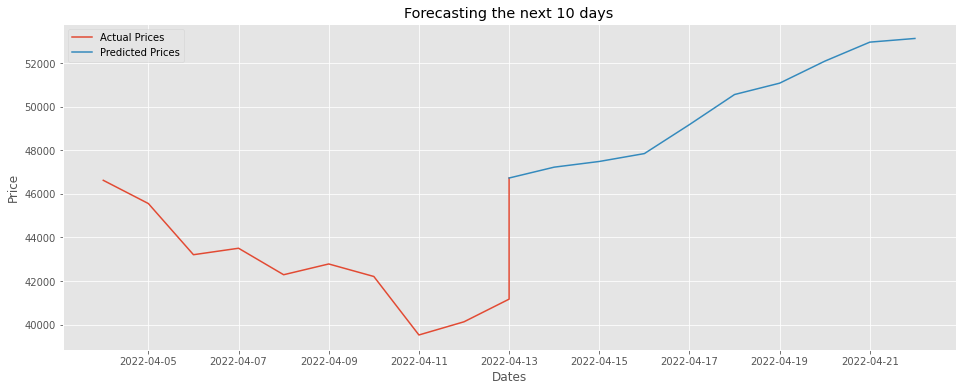

In [17]:
# Memprediksi y
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]

# Mengubah nilai 
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Membuat DF dari harga prediksi
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat), freq="D"), columns=df.columns)

# Mencetak nilai prediksi
print(preds)

# Nomor periode untuk di visual nilai sebenarnya
pers = 10

# Mengubah nilai sebenernya menjadi harga asli
actual = pd.DataFrame(scaler.inverse_transform(df[["Close"]].tail(pers)), index=df.Close.tail(pers).index, columns=df.columns).append(preds.head(1))

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.savefig("BTC_predictions.png")
plt.show()